<a href="https://colab.research.google.com/github/cz101/ML-TF/blob/main/TF2_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Flatten, Dense, Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [11]:
cifar_mnist = tf.keras.datasets.cifar10 # 10 classes
(x_train,y_train),(x_test ,y_test) = cifar_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
y_train,_test = y_train.flatten(),y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape",y_train.shape)

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [12]:
K= len(set(y_train))
print("number of calsses :",K)

number of calsses : 10


In [14]:
from threading import active_count
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2 ,activation='relu')(i)
x = Conv2D(64,(3,3), strides=2 ,activation='relu')(x)
x = Conv2D(128,(3,3), strides=2 ,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4921 - accuracy: 0.4583 - val_loss: 1.2466 - val_accuracy: 0.5493
Epoch 2/15
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1635 - accuracy: 0.5820 - val_loss: 1.0640 - val_accuracy: 0.6197
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0090 - accuracy: 0.6435 - val_loss: 0.9797 - val_accuracy: 0.6525
Epoch 4/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8885 - accuracy: 0.6839 - val_loss: 0.9298 - val_accuracy: 0.6729
Epoch 5/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7854 - accuracy: 0.7203 - val_loss: 0.9510 - val_accuracy: 0.6725
Epoch 6/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6942 - accuracy: 0.7524 - val_loss: 0.9083 - val_accuracy: 0.6896
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6061 - accuracy: 0.7836 - val_loss: 0.9081 -

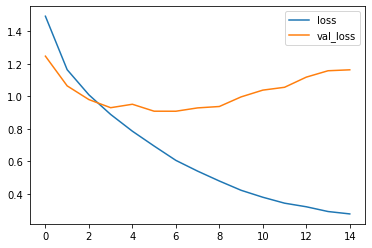

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

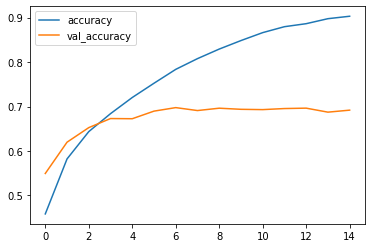

In [17]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion Matrix without Normalize
[[701  19  29  31  26  13   9  19 109  44]
 [ 18 803  13  16   4   6   7   4  34  95]
 [ 69   3 515  97 105 106  46  27  17  15]
 [ 24   9  40 512  77 241  48  25  13  11]
 [ 13   2  53  75 683  69  35  54  13   3]
 [  6   6  17 187  65 647  24  31  11   6]
 [  5  10  29  98  46  47 743   9   9   4]
 [ 14   3  26  40  73 100   5 720  12   7]
 [ 37  38   7  20  13   7   7   1 851  19]
 [ 40  87  11  34   8  15   9  11  42 743]]


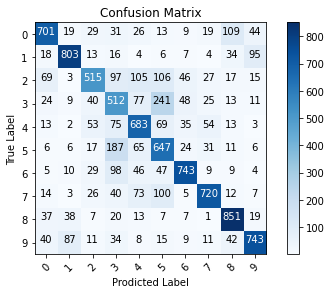

In [18]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
     cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
     print("Normalize matrix")
  else: 
    print("Confusion Matrix without Normalize")

  print(cm)  

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title) 
  plt.colorbar() 
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh =  cm.max() /2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
              horizontalalignment ="center",
              color='white' if cm [i,j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Prodicted Label")
  plt.show()


p_test =model.predict(x_test).argmax(axis =1)
cm= confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))